In [4]:
import os
import numpy as np
import matplotlib.pyplot as plt
from pydicom import dcmread
import pymedphys

from pydicom import dcmread
import pydicom
import numpy as np
import pymedphys
import matplotlib as mpl
import matplotlib.pyplot as plt

In [5]:
plt.rcParams['font.family'] = 'serif'
plt.rcParams['font.serif'] = ['Computer Modern Roman']
plt.rcParams['text.usetex'] = True
plt.rcParams['image.cmap'] = 'viridis_r'
plt.rcParams.update({'font.size': 14})

# Pirámide

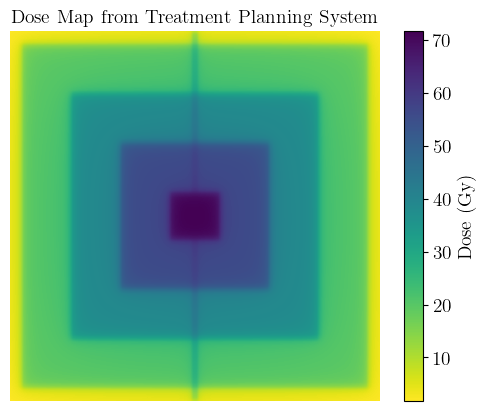

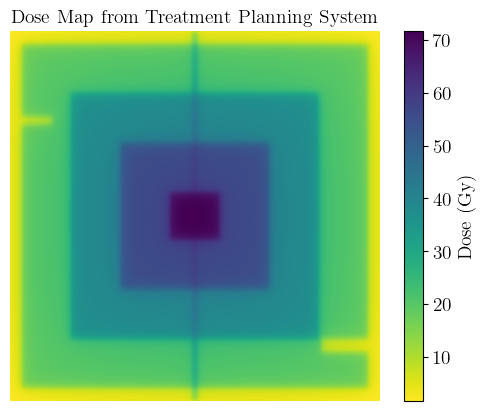

[[25897 26833 27596 ... 27151 26367 25428]
 [26629 27681 28535 ... 28084 27209 26154]
 [27361 28530 29474 ... 29017 28051 26879]
 ...
 [27049 28216 29155 ... 29159 28223 27078]
 [26339 27390 28239 ... 28234 27392 26369]
 [25629 26565 27323 ... 27310 26561 25660]]
[[25733 26669 27432 ... 27134 26349 25410]
 [26463 27515 28368 ... 28068 27193 26137]
 [27193 28360 29304 ... 29002 28036 26864]
 ...
 [27033 28198 29137 ... 28334 27404 26264]
 [26323 27373 28221 ... 27422 26584 25566]
 [25613 26547 27305 ... 26509 25765 24868]]
[[0.02532885 0.02624431 0.02699057 ... 0.02655534 0.02578854 0.02487014]
 [0.02604479 0.02707371 0.02790897 ... 0.02746787 0.02661206 0.02558021]
 [0.02676073 0.02790408 0.02882737 ... 0.0283804  0.02743559 0.0262893 ]
 ...
 [0.02645557 0.02759697 0.02851537 ... 0.02851928 0.02760382 0.02648394]
 [0.02576115 0.02678909 0.02761947 ... 0.02761458 0.02679105 0.02579049]
 [0.02506673 0.02598219 0.02672356 ... 0.02671085 0.02597828 0.02509705]]
[[0.02516847 0.02608394 0.02

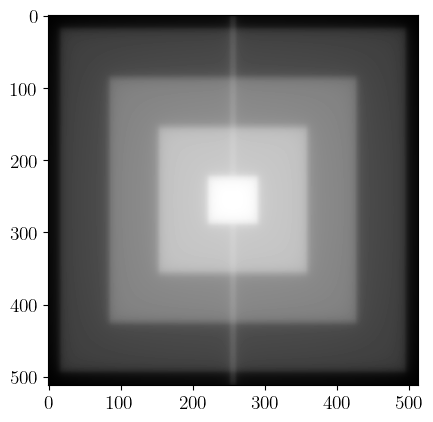

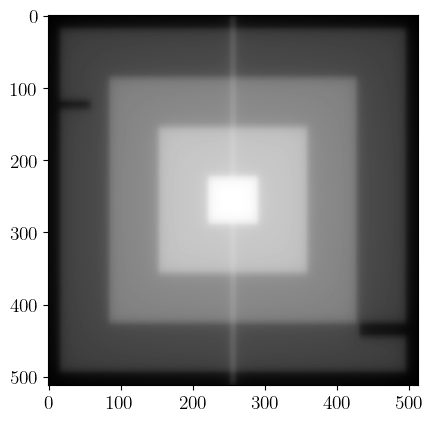

El porentaje de aprovacion es 0.9826842675751006
(258320,)
0.9826842675751006


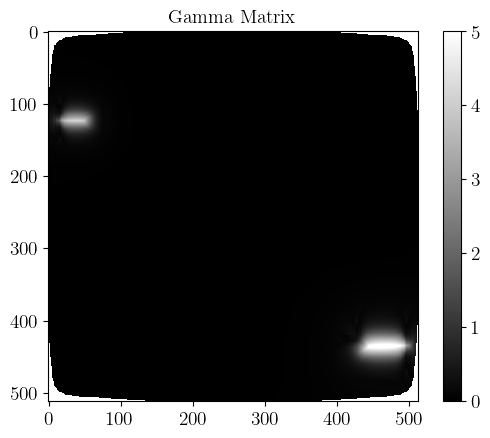

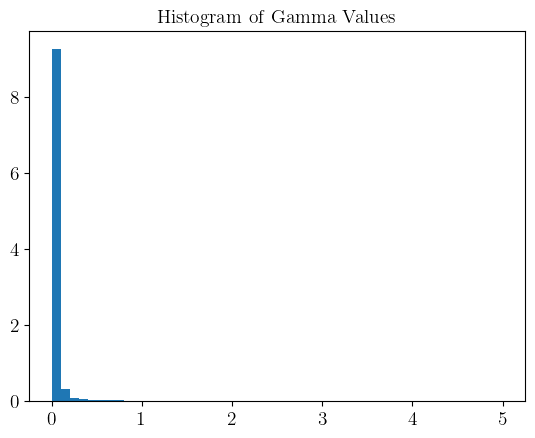

In [ ]:
folder_path = os.path.join('media', 'Juliana 2')

ds1 = dcmread(os.path.join(folder_path, 'PiramieGamma.dcm'))
ds2 = dcmread(os.path.join(folder_path, 'Piramide2laminas.dcm'))


plt.imshow(ds1.pixel_array*ds1.DoseGridScaling)
plt.title('Dose Map from Treatment Planning System', fontsize=14)
plt.colorbar(label='Dose (Gy)')
# set off axis
plt.axis('off')
#plt.imshow(ds.pixel_array)
plt.show()

plt.imshow(ds2.pixel_array*ds2.DoseGridScaling)
plt.title('Dose Map from Treatment Planning System', fontsize=14)
plt.colorbar(label='Dose (Gy)')
# set off axis
plt.axis('off')
#plt.imshow(ds.pixel_array)
plt.show()


#ds1=dcmread('/home/carlos/Escritorio/Piramide_2.0/PiramideGamma.dcm')
#ds2=dcmread('/home/carlos/Escritorio/Piramide_2.0/Piramide2laminas.dcm')
#print(ds1)
#print(ds2)
print(ds1.pixel_array)
print(ds2.pixel_array)
reference = ds1.pixel_array/np.max(ds1.pixel_array)
evaluation = ds2.pixel_array/np.max(ds2.pixel_array)
print(reference)
print(evaluation)



plt.imshow(reference,cmap=plt.cm.gray)
plt.figure()
plt.imshow(evaluation,cmap=plt.cm.gray)
plt.show()

#reference=reference/26.334
#evaluation=evaluation/26.334
#print(evaluation.shape)
#print(reference.shape)



x1=np.linspace(0,512*ds1.PixelSpacing[0],512)
y1=np.linspace(0,512*ds1.PixelSpacing[1],512)

x2=np.linspace(0,512*ds2.PixelSpacing[0],512)
y2=np.linspace(0,512*ds2.PixelSpacing[1],512)


"""
x1=np.linspace(0,300,768)
y1=np.linspace(0,400,1024)

x2=np.linspace(0,300,768)
y2=np.linspace(0,400,1024)
"""

ejes1=(x1,y1)
ejes2=(x2,y2)

dd=1
mm=1

    


gamma_options = {
    'dose_percent_threshold': dd,
    'distance_mm_threshold': mm,
    'lower_percent_dose_cutoff':5,
    'interp_fraction':10,  # Should be 10 or more for more accurate results
    'max_gamma': 5,
    'random_subset': None,
    'local_gamma': False,
    'ram_available': 5*(2**29)  # 1/2 GB
}

gamma = pymedphys.gamma(
    ejes1, reference,
    ejes2, evaluation,
    **gamma_options)
    

plt.imshow(gamma,cmap=plt.cm.gray)
plt.title('Gamma Matrix', fontsize=14)
plt.colorbar()
valid_gamma = gamma[~np.isnan(gamma)]
pass_ratio = np.sum(valid_gamma <= 1) / len(valid_gamma)
print("El porentaje de aprovacion es",pass_ratio)

valid_gamma = gamma[~np.isnan(gamma)]
print(valid_gamma.shape)

plt.figure()
  
valid_gamma = gamma[~np.isnan(gamma)]
num_bins = (gamma_options['interp_fraction'] * gamma_options['max_gamma'])
bins = np.linspace(0, gamma_options['max_gamma'], num_bins + 1)
plt.hist(valid_gamma, bins, density=True)
plt.title('Histogram of Gamma Values', fontsize=14)
#plt.set_xlim([0, gamma_options['max_gamma']])
pass_ratio = np.sum(valid_gamma <= 1) / len(valid_gamma)
print(pass_ratio)
plt.show()


Pass percentage: 98.27%


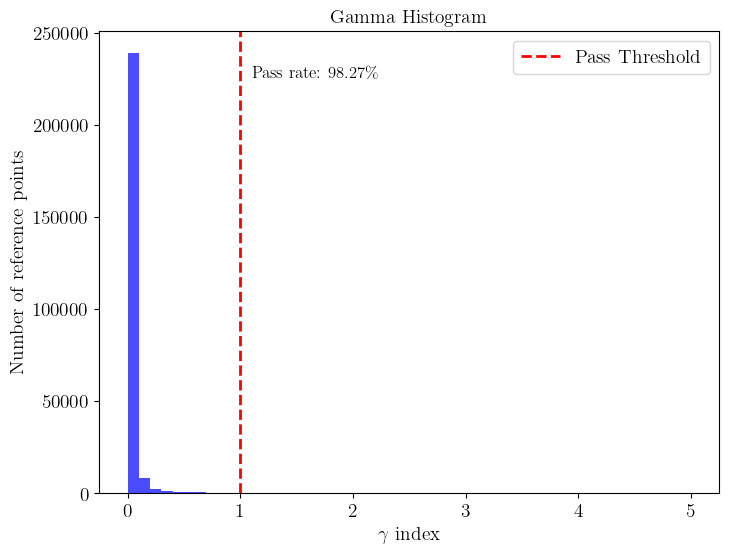

In [4]:
folder_path = os.path.join('media', 'Juliana 2')

# Load DICOM files
ds1 = dcmread(os.path.join(folder_path, 'PiramieGamma.dcm'))
ds2 = dcmread(os.path.join(folder_path, 'Piramide2laminas.dcm'))

# Normalize dose images
reference = ds1.pixel_array / np.max(ds1.pixel_array)
evaluation = ds2.pixel_array / np.max(ds2.pixel_array)

# Define spatial axes
x1 = np.linspace(0, 512 * ds1.PixelSpacing[0], 512)
y1 = np.linspace(0, 512 * ds1.PixelSpacing[1], 512)

x2 = np.linspace(0, 512 * ds2.PixelSpacing[0], 512)
y2 = np.linspace(0, 512 * ds2.PixelSpacing[1], 512)

ejes1 = (x1, y1)
ejes2 = (x2, y2)

# Gamma analysis parameters
gamma_options = {
    'dose_percent_threshold': 1,
    'distance_mm_threshold': 1,
    'lower_percent_dose_cutoff': 5,
    'interp_fraction': 10,
    'max_gamma': 5,
    'random_subset': None,
    'local_gamma': False,
    'ram_available': 5 * (2 ** 29)
}

# Compute Gamma index
gamma = pymedphys.gamma(
    ejes1, reference,
    ejes2, evaluation,
    **gamma_options
)

# Filter out NaN values
valid_gamma = gamma[~np.isnan(gamma)]

# Calculate pass percentage
pass_ratio = np.sum(valid_gamma <= 1) / len(valid_gamma)
print(f"Pass percentage: {pass_ratio * 100:.2f}%")

# Create Gamma histogram
plt.figure(figsize=(8, 6))
num_bins = (gamma_options['interp_fraction'] * gamma_options['max_gamma'])
bins = np.linspace(0, gamma_options['max_gamma'], num_bins + 1)

plt.hist(valid_gamma, bins, density=False, alpha=0.7, color='blue')

# Add a vertical red dashed line at x=1 (pass threshold)
plt.axvline(x=1, color='red', linestyle='--', linewidth=2, label="Pass Threshold")

# Display pass percentage as text
plt.text(1.1, 0.9 * plt.ylim()[1], f"Pass rate: {pass_ratio * 100:.2f}\%", color='black', fontsize=12)

plt.title('Gamma Histogram', fontsize=14)
plt.xlabel(r'$\gamma$ index')
plt.ylabel('Number of reference points')
plt.legend()
#plt.grid(True)

plt.show()


# Mama

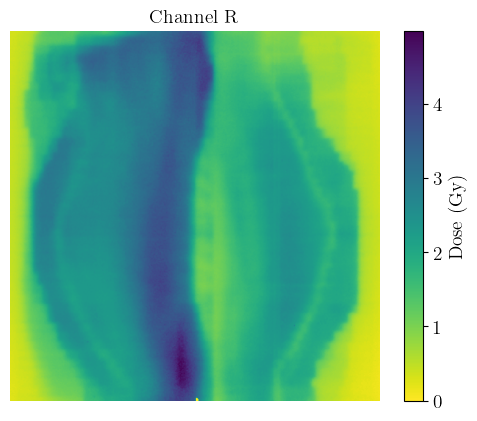

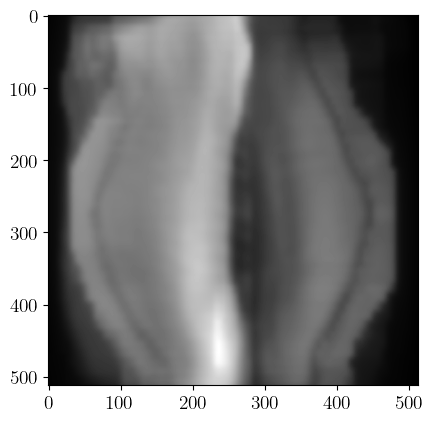

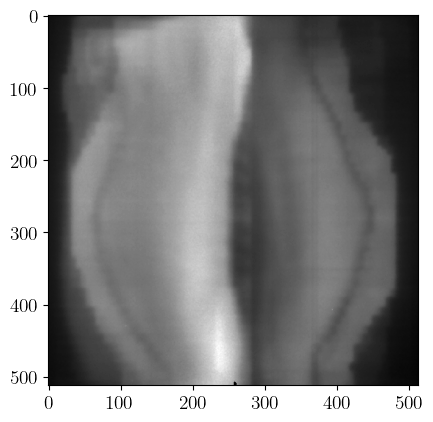

El porentaje de aprovacion es 0.8976982413344102
(242684,)
0.8976982413344102


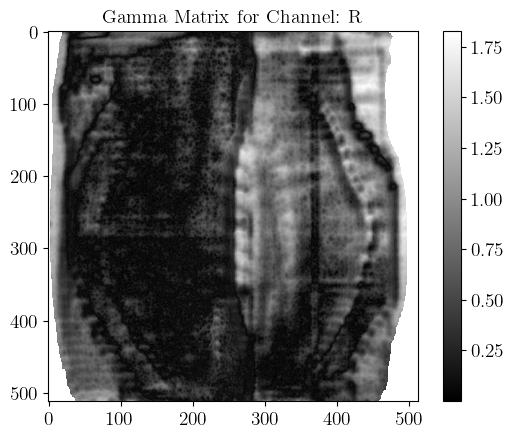

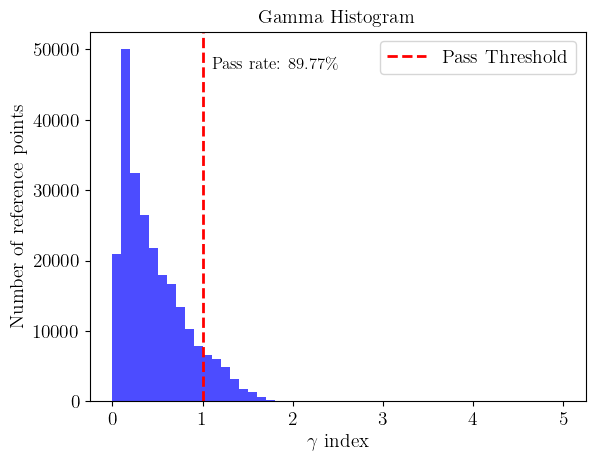

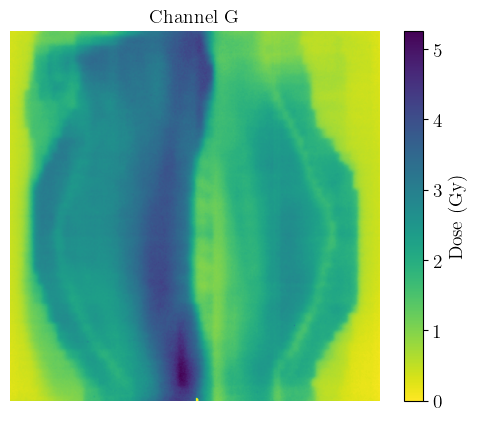

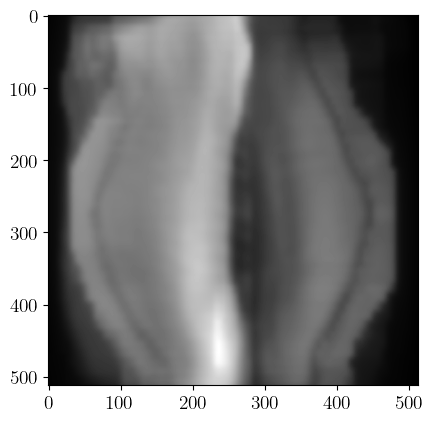

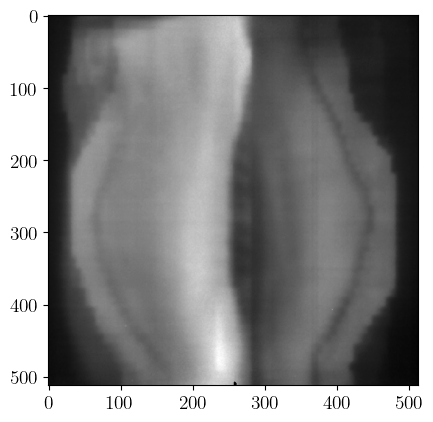

El porentaje de aprovacion es 0.9527822188524996
(242684,)
0.9527822188524996


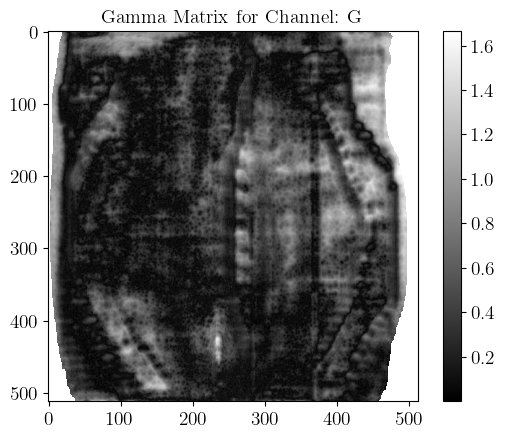

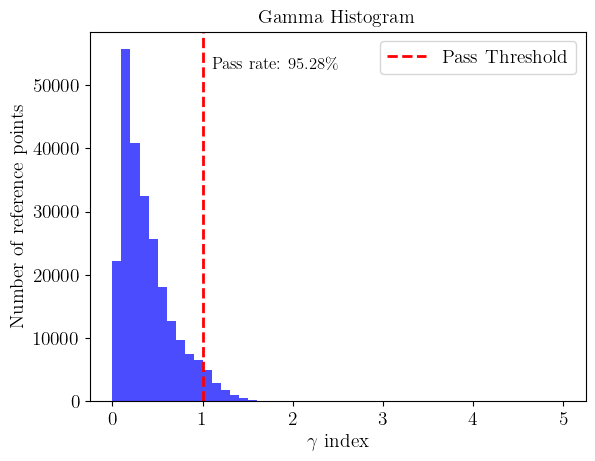

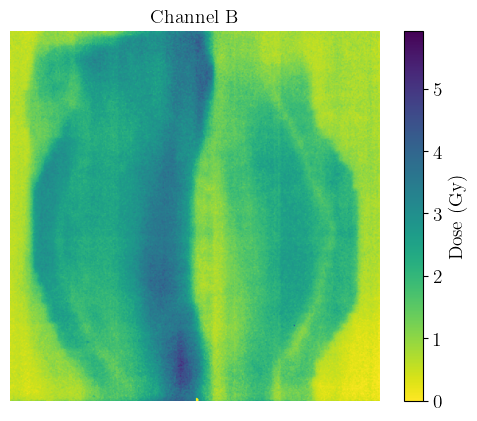

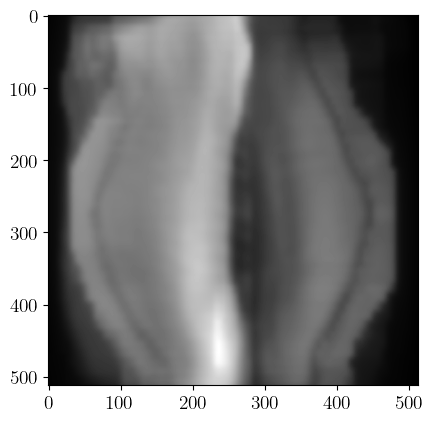

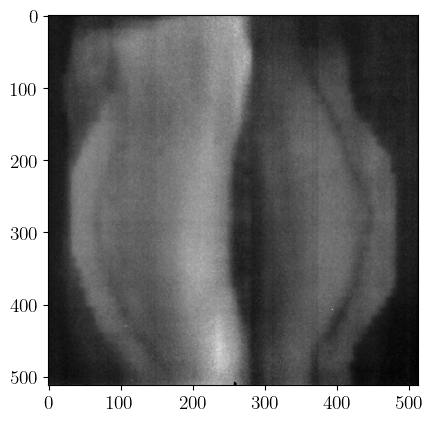

El porentaje de aprovacion es 0.47243328773219495
(242684,)
0.47243328773219495


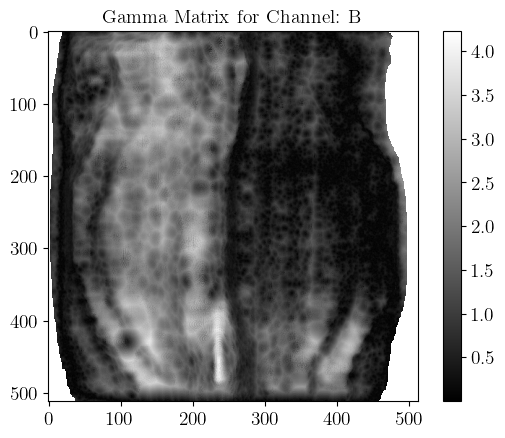

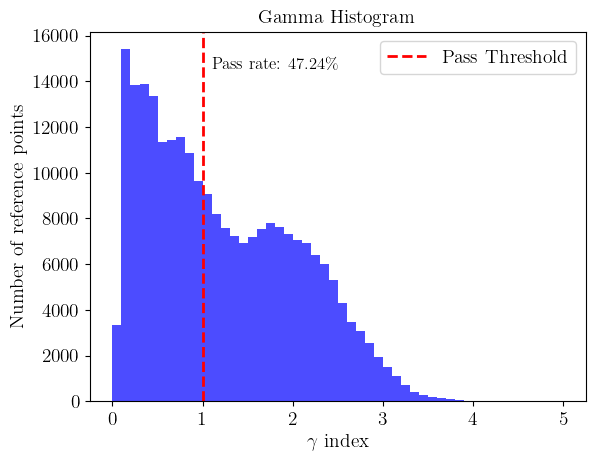

In [13]:
channel = ['R', 'G', 'B']

for i in range(3):

    path = os.path.join('media', 'maps', f'B_marked_new_dose_map_channel_{i}.npy')

    dose_map = np.load(path)

    #ds1 = dcmread(os.path.join(folder_path, 'RD.1.2.246.352.71.7.593947511628.1265765.20201029164313.dcm'))
    ds1 = dcmread(os.path.join('media', 'mama_TPS.dcm'))


    #a_rotated_reflected
    plt.imshow(dose_map)
    plt.title(f'Channel {channel[i]}', fontsize=14)
    plt.colorbar(label='Dose (Gy)')
    # set off axis
    plt.axis('off')
    #plt.imshow(ds.pixel_array)
    plt.show()
    #ds1=dcmread('/home/carlos/Escritorio/Piramide_2.0/PiramideGamma.dcm')
    #ds2=dcmread('/home/carlos/Escritorio/Piramide_2.0/Piramide2laminas.dcm')
    #print(ds1)
    #print(ds2)

    reference = ds1.pixel_array/np.max(ds1.pixel_array)
    evaluation = dose_map/np.max(dose_map)

    plt.imshow(reference,cmap=plt.cm.gray)
    plt.figure()
    plt.imshow(evaluation,cmap=plt.cm.gray)
    plt.show()

    #reference=reference/26.334
    #evaluation=evaluation/26.334
    #print(evaluation.shape)
    #print(reference.shape)



    x1=np.linspace(0,512*ds1.PixelSpacing[0],512)
    y1=np.linspace(0,512*ds1.PixelSpacing[1],512)

    x2=np.linspace(0,512*ds1.PixelSpacing[0],512)
    y2=np.linspace(0,512*ds1.PixelSpacing[1],512)


    """
    x1=np.linspace(0,300,768)
    y1=np.linspace(0,400,1024)

    x2=np.linspace(0,300,768)
    y2=np.linspace(0,400,1024)
    """

    ejes1=(x1,y1)
    ejes2=(x2,y2)

    dd=3
    mm=3


    gamma_options = {
        'dose_percent_threshold': dd,
        'distance_mm_threshold': mm,
        'lower_percent_dose_cutoff':5,
        'interp_fraction':10,  # Should be 10 or more for more accurate results
        'max_gamma': 5,
        'random_subset': None,
        'local_gamma': False,
        'ram_available': 5*(2**29)  # 1/2 GB
    }

    gamma = pymedphys.gamma(
        ejes1, reference,
        ejes2, evaluation,
        **gamma_options)
        


    plt.imshow(gamma,cmap=plt.cm.gray)
    plt.title(f'Gamma Matrix for Channel: {channel[i]}', fontsize=14)
    plt.colorbar()
    valid_gamma = gamma[~np.isnan(gamma)]
    pass_ratio = np.sum(valid_gamma <= 1) / len(valid_gamma)
    print("El porentaje de aprovacion es",pass_ratio)

    valid_gamma = gamma[~np.isnan(gamma)]
    print(valid_gamma.shape)

    plt.figure()
    
    valid_gamma = gamma[~np.isnan(gamma)]
    num_bins = (gamma_options['interp_fraction'] * gamma_options['max_gamma'])
    bins = np.linspace(0, gamma_options['max_gamma'], num_bins + 1)
    #plt.hist(valid_gamma, bins, density=True)
    plt.hist(valid_gamma, bins, density=False, alpha=0.7, color='blue')

    # Add a vertical red dashed line at x=1 (pass threshold)
    plt.axvline(x=1, color='red', linestyle='--', linewidth=2, label="Pass Threshold")

    pass_ratio = np.sum(valid_gamma <= 1) / len(valid_gamma)

    # Display pass percentage as text
    plt.text(1.1, 0.9 * plt.ylim()[1], f"Pass rate: {pass_ratio * 100:.2f}\%", color='black', fontsize=12)

    plt.title('Gamma Histogram', fontsize=14)
    plt.xlabel(r'$\gamma$ index')
    plt.ylabel('Number of reference points')
    plt.legend()

    #plt.set_xlim([0, gamma_options['max_gamma']])
    print(pass_ratio)
    plt.show()


# General

In [2]:
import os

In [51]:
plt.rcParams['font.family'] = 'serif'
plt.rcParams['font.serif'] = ['Computer Modern Roman']
plt.rcParams['text.usetex'] = True
plt.rcParams['image.cmap'] = 'viridis_r'
plt.rcParams.update({'font.size': 14})

In [ ]:
#plt.style.use('science')

In [49]:

plt.style.use('default') 

CHANNEL: R
El porcentaje de aprobación es 0.8976982413344102


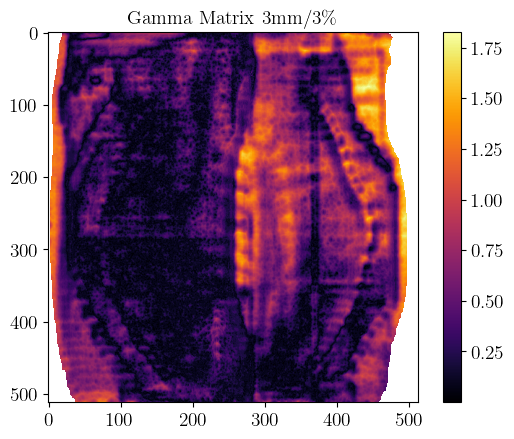

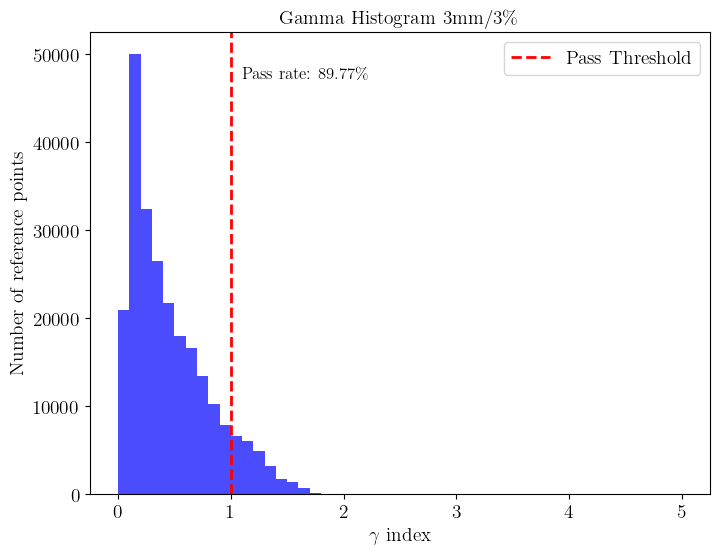

CHANNEL: G
El porcentaje de aprobación es 0.9527822188524996


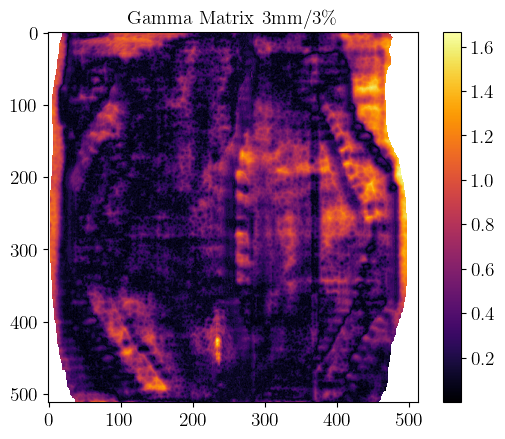

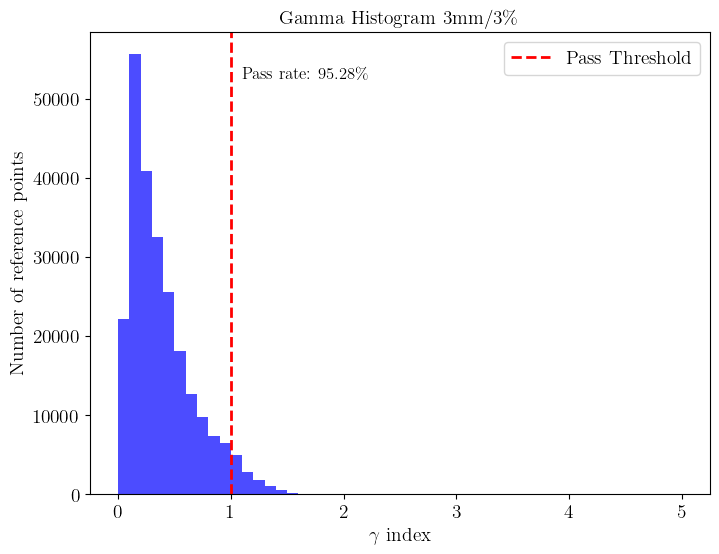

CHANNEL: B
El porcentaje de aprobación es 0.47243328773219495


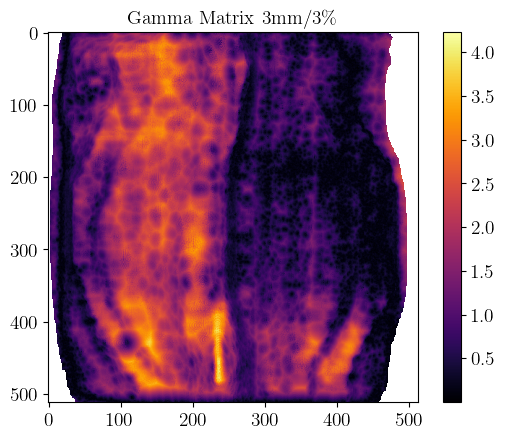

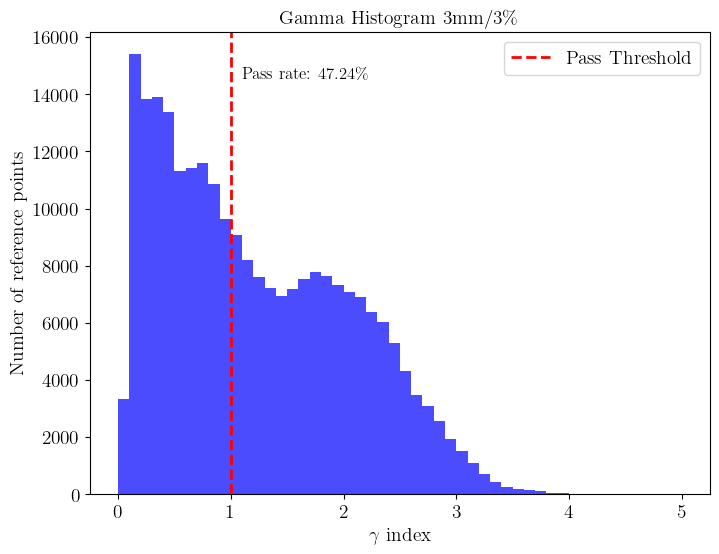

In [52]:
def calculate_gamma(TPS_map, verification_map, dd, mm):
    """
    Calculate the gamma index between two dose maps.
    """
    # Normalize the dose maps
    reference = TPS_map / np.max(TPS_map)
    evaluation = verification_map / np.max(verification_map)

    # Define spatial axes
    x1 = np.linspace(0, 512 * ds1.PixelSpacing[0], 512)
    y1 = np.linspace(0, 512 * ds1.PixelSpacing[1], 512)

    x2 = np.linspace(0, 512 * ds1.PixelSpacing[0], 512)
    y2 = np.linspace(0, 512 * ds1.PixelSpacing[1], 512)

    ejes1 = (x1, y1)
    ejes2 = (x2, y2)

    # Gamma analysis parameters
    gamma_options = {
        'dose_percent_threshold': dd,
        'distance_mm_threshold': mm,
        'lower_percent_dose_cutoff': 5,
        'interp_fraction': 10,
        'max_gamma': 5,
        'random_subset': None,
        'local_gamma': False,
        'ram_available': 5 * (2 ** 29)
    }

    # Compute Gamma index
    gamma = pymedphys.gamma(
        ejes1, reference,
        ejes2, evaluation,
        **gamma_options
    )

    return gamma, gamma_options

def plot_gamma_matrix(gamma_matrix, gamma_options, title = None):
    """
    Plot the gamma matrix.
    """
    if title is None:
        title = f'Gamma Matrix {gamma_options["distance_mm_threshold"]}mm/{gamma_options["dose_percent_threshold"]}\%'
    #print(gamma_matrix)
    plt.imshow(gamma_matrix, cmap='inferno')
    plt.title(title, fontsize=14)
    plt.colorbar()
    valid_gamma = gamma_matrix[~np.isnan(gamma_matrix)]
    #print(valid_gamma)
    pass_ratio = np.sum(valid_gamma <= 1) / len(valid_gamma)
    print("El porcentaje de aprobación es", pass_ratio)



def plot_gamma_histogram(gamma_matrix, gamma_options, title = None):
    """
    Plot the histogram of gamma values.
    """
    if title is None:
        title = f'Gamma Histogram {gamma_options["distance_mm_threshold"]}mm/{gamma_options["dose_percent_threshold"]}\%'
        
    valid_gamma = gamma_matrix[~np.isnan(gamma_matrix)]
    num_bins = (gamma_options['interp_fraction'] * gamma_options['max_gamma'])
    bins = np.linspace(0, gamma_options['max_gamma'], num_bins + 1)

    plt.figure(figsize=(8, 6))
    plt.hist(valid_gamma, bins, density=False, alpha=0.7, color='blue')

    # Add a vertical red dashed line at x=1 (pass threshold)
    plt.axvline(x=1, color='red', linestyle='--', linewidth=2, label="Pass Threshold")

    # Display pass percentage as text
    pass_ratio = np.sum(valid_gamma <= 1) / len(valid_gamma)
    plt.text(1.1, 0.9 * plt.ylim()[1], f"Pass rate: {pass_ratio * 100:.2f}\%", color='black', fontsize=12)

    plt.title(title, fontsize=14)
    plt.xlabel(r'$\gamma$ index')
    plt.ylabel('Number of reference points')
    plt.legend()
    plt.show()


channel = ['R', 'G', 'B']

for i in range(3):

    print(f'CHANNEL: {channel[i]}')

    path = os.path.join('media', 'maps', f'B_marked_new_dose_map_channel_{i}.npy')
    dose_map = np.load(path)

    ds1 = dcmread(os.path.join('media', 'mama_TPS.dcm'))
    TPS_map = ds1.pixel_array * ds1.DoseGridScaling

    # Calculate gamma index
    gamma, gamma_options = calculate_gamma(TPS_map, dose_map, dd=3, mm=3)
    # Plot gamma matrix
    plot_gamma_matrix(gamma, gamma_options)
    # Plot gamma histogram
    plot_gamma_histogram(gamma, gamma_options)
    # Save gamma matrix and histogram plots

El porcentaje de aprobación es 0.9242471691582469


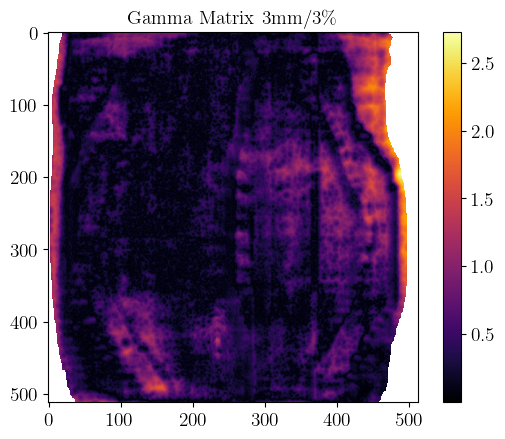

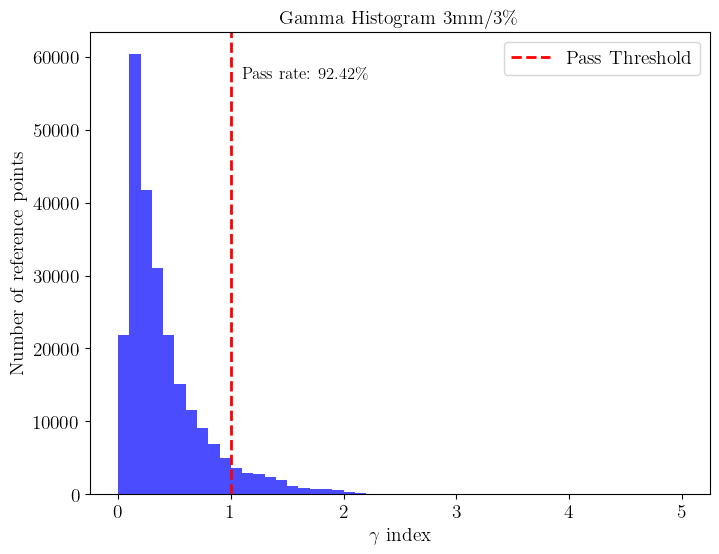

In [56]:
path = os.path.join('media', 'maps', f'dose_map_multi_copy.npy')
dose_map = np.load(path)

ds1 = dcmread(os.path.join('media', 'mama_TPS.dcm'))
TPS_map = ds1.pixel_array * ds1.DoseGridScaling

# Calculate gamma index
gamma, gamma_options = calculate_gamma(TPS_map, dose_map, dd=3, mm=3)
# Plot gamma matrix
plot_gamma_matrix(gamma, gamma_options)
# Plot gamma histogram
plot_gamma_histogram(gamma, gamma_options=gamma_options)
# Save gamma matrix and histogram plots